In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import metrics
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = acquire.acquire_military()

In [3]:
df = prepare.prep_military(df)

In [4]:
df

,country,country_code,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,...,subs,tanker_fleet,tanks,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength,total_strengths
132,United States,USA,1390000,20,45193,2837,1693,147399295,22,770000000000,...,68,627,6612,334998398,2661,982,25447,220,56008,81675
26,China,CHN,2000000,3,35000,5854,652,754864769,70,250240000000,...,79,3,5250,1397897720,399,286,5651,430,49264,55345
103,Russia,RUS,850000,1,30122,14145,1283,69737187,86,154000000000,...,70,20,12420,142320790,522,445,8118,291,60078,68487
131,United Kingdom,UKD,194000,2,5015,215,47,30857260,0,68000000000,...,10,9,227,67081000,247,40,1291,67,5501,6859
44,Germany,GER,184000,0,9217,121,130,36755601,5,50300000000,...,6,0,266,79903481,37,43,1155,35,9642,10832
50,India,IND,1450000,1,12000,3411,167,629485342,22,49600000000,...,17,6,4614,1339330514,353,253,3837,191,21363,25391
58,Japan,JPN,240000,4,5500,694,142,53615536,6,47482740000,...,21,7,1004,124687293,425,59,2800,99,7297,10196
112,South Korea,SKO,555000,2,13990,6894,202,25857581,11,46320000000,...,22,4,2624,51715162,289,41,2900,189,24082,27171
104,Saudi Arabia,SAR,225000,0,6202,2523,115,18087554,4,46000000000,...,0,22,1062,34783757,190,49,1545,53,10062,11660
6,Australia,AUS,59000,2,1765,54,59,10840189,0,44618000000,...,6,6,59,25809973,113,38,810,35,1878,2723


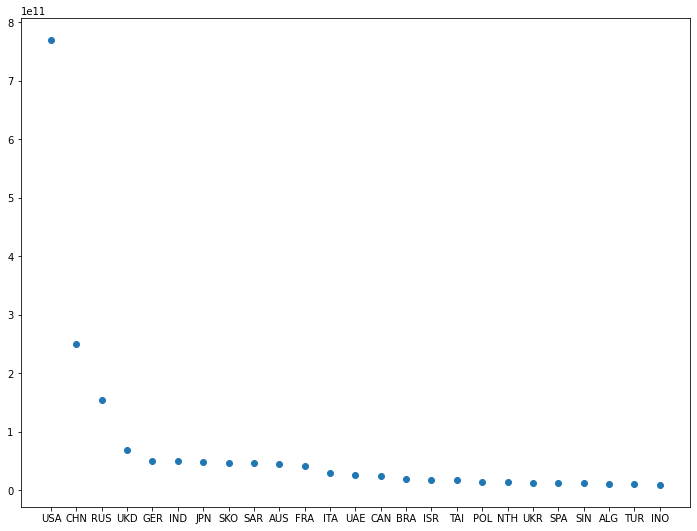

In [5]:
plt.figure(figsize = (12,9))
plt.scatter(df.iloc[:,1], df.iloc[:,9])

In [6]:
df = prepare.split_military(df)

Train: 14 rows, 39 cols
Validate: 6 rows, 39 cols
Test: 5 rows, 39 cols


In [7]:
train, validate, test = df

In [8]:
train.shape

(14, 39)

In [9]:
train.head(25).T

,22,26,104,98,58,17,132,114,44,112,130,103,56,41
country,Canada,China,Saudi Arabia,Poland,Japan,Brazil,United States,Spain,Germany,South Korea,United Arab Emirates,Russia,Italy,France
country_code,CAN,CHN,SAR,POL,JPN,BRA,USA,SPA,GER,SKO,UAE,RUS,ITA,FRA
active_personnel,70000,2000000,225000,120000,240000,360000,1390000,120000,184000,555000,65000,850000,170000,205000
air_carriers,0,3,0,0,4,1,20,1,0,2,0,1,2,4
armored_vehicles,1534,35000,6202,4786,5500,1958,45193,5033,9217,13990,9255,30122,6908,6558
arty,163,5854,2523,609,694,682,2837,236,121,6894,259,14145,162,214
attack_aircraft,0,652,115,30,142,89,1693,35,130,202,50,1283,154,69
avail_manpower,16315589,754864769,18087554,18711097,53615536,108857163,147399295,21739869,36755601,25857581,5716835,69737187,28075664,29957055
corvettes,0,70,4,2,6,2,22,0,5,11,9,86,0,0
defense_budget,23550574382,250240000000,46000000000,14500000000,47482740000,18785000000,770000000000,11750000000,50300000000,46320000000,25266000000,154000000000,29198401050,40900000000


In [10]:
numcols = [col for col in train.columns if train[col].dtype !='O']
numcols

['active_personnel',
 'air_carriers',
 'armored_vehicles',
 'arty',
 'attack_aircraft',
 'avail_manpower',
 'corvettes',
 'defense_budget',
 'destroyers',
 'external_debt',
 'fighters_interceptors',
 'frigates',
 'helos',
 'merch_marine_fleet',
 'mine_warfare',
 'navy_ships',
 'oil_consumption',
 'oil_production',
 'oil_reser',
 'paramilitary',
 'patrol_vess',
 'purchasing_power',
 'res_personnel',
 'road_coverage',
 'rocket_proj',
 'special_mission',
 'square_land_area',
 'subs',
 'tanker_fleet',
 'tanks',
 'total_pop',
 'trainers',
 'transports',
 'total_air_strength',
 'total_sea_strength',
 'total_land_strength',
 'total_strengths']

Text(8, 80, 'r = 0.983')

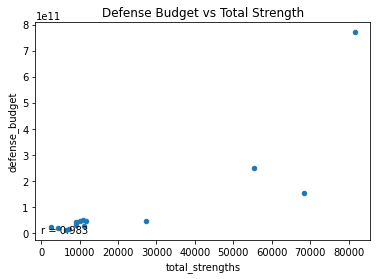

In [11]:
r, p = stats.pearsonr(train.total_air_strength, train.defense_budget)

train.plot.scatter('total_strengths', 'defense_budget')
plt.title('Defense Budget vs Total Strength')
plt.text(8, 80, f'r = {r:.3f}')

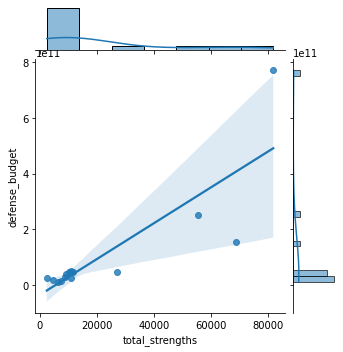

In [54]:
sns.jointplot(x="total_strengths", y="defense_budget", data=train,  kind='reg', height=5)
plt.show()

<AxesSubplot:xlabel='total_air_strength', ylabel='Density'>

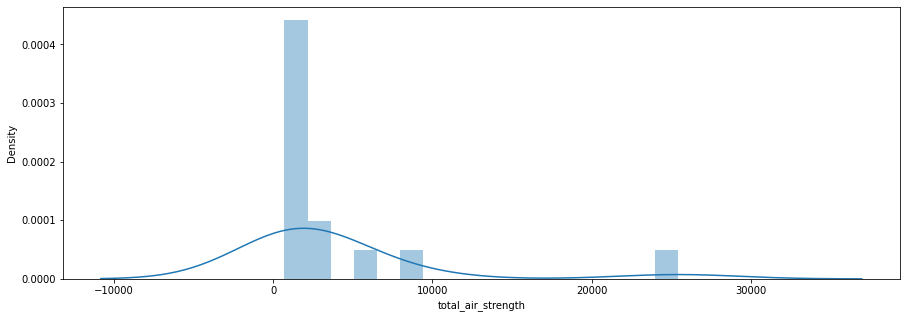

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(train.total_air_strength)

<AxesSubplot:xlabel='total_sea_strength', ylabel='Density'>

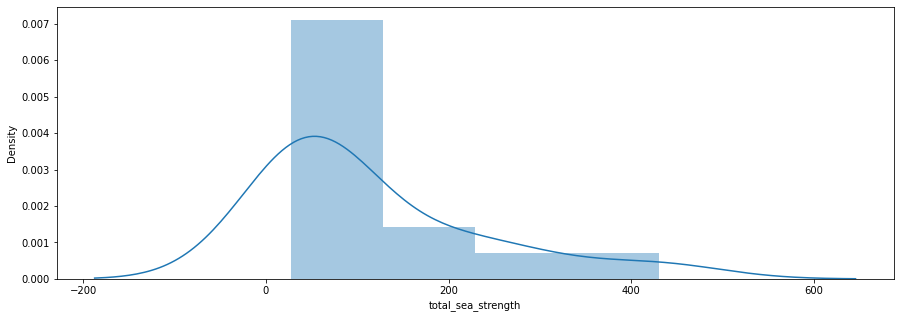

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(train.total_sea_strength)

<AxesSubplot:xlabel='total_land_strength', ylabel='Density'>

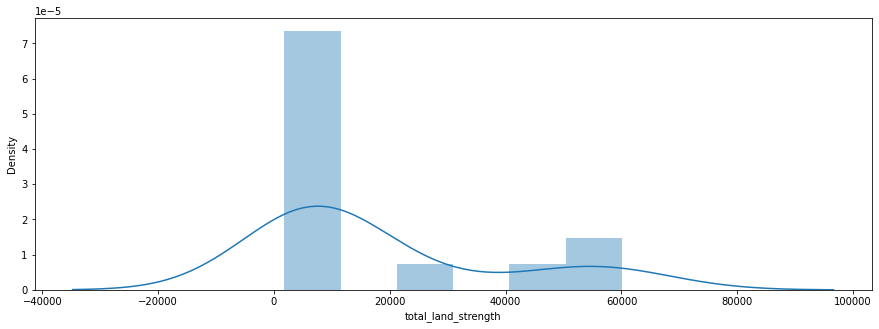

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(train.total_land_strength)

active_personnel


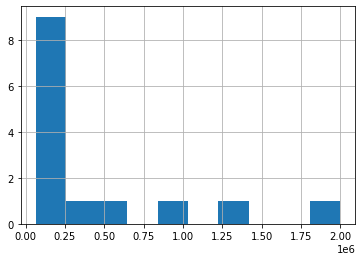

air_carriers


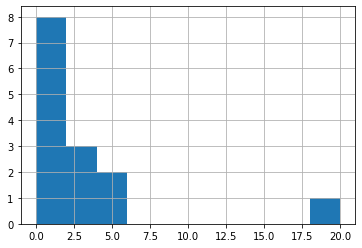

armored_vehicles


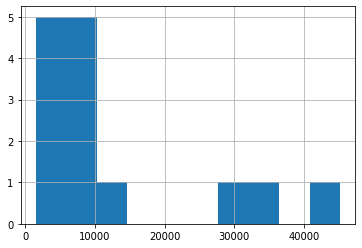

arty


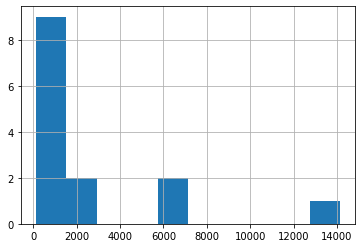

attack_aircraft


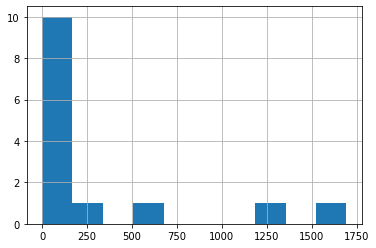

avail_manpower


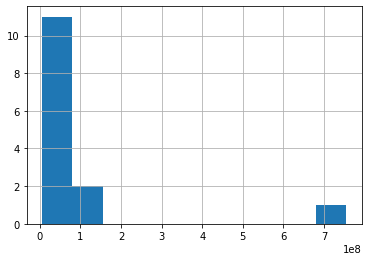

corvettes


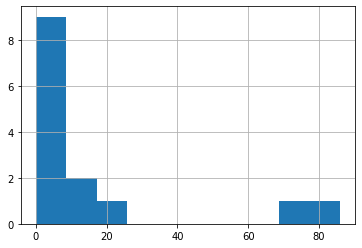

defense_budget


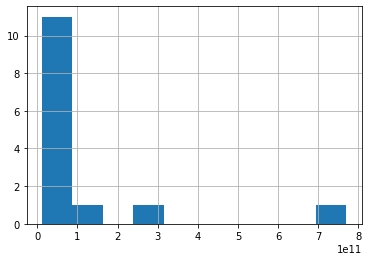

destroyers


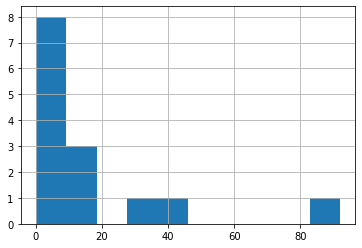

external_debt


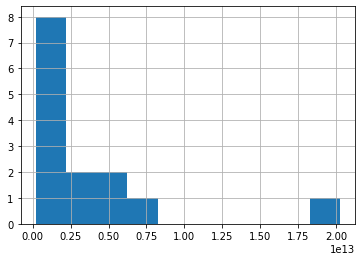

fighters_interceptors


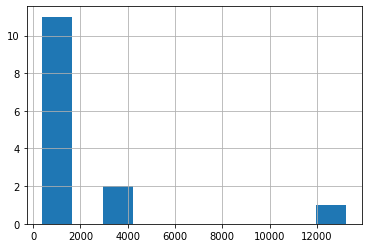

frigates


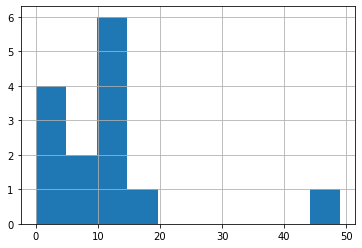

helos


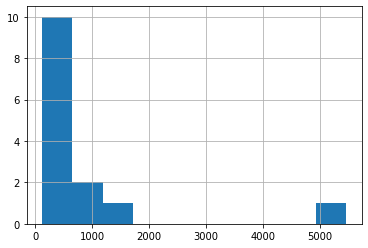

merch_marine_fleet


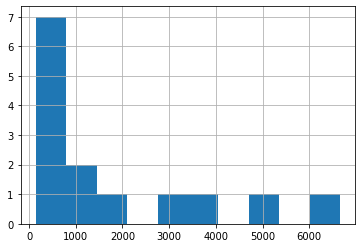

mine_warfare


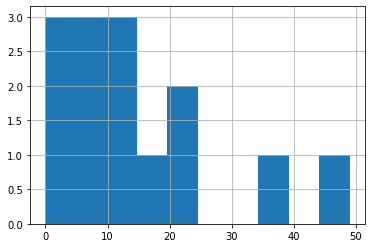

navy_ships


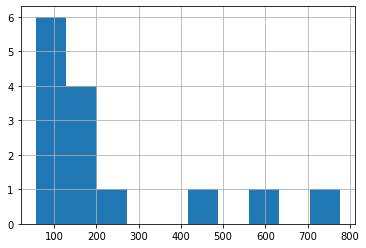

oil_consumption


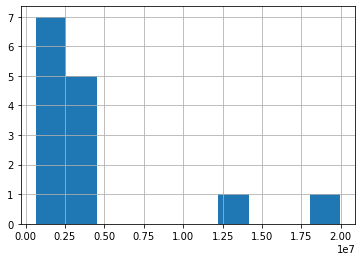

oil_production


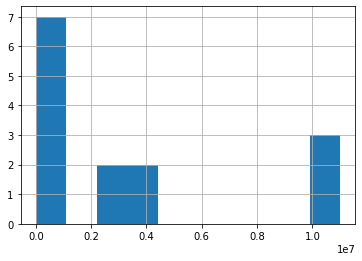

oil_reser


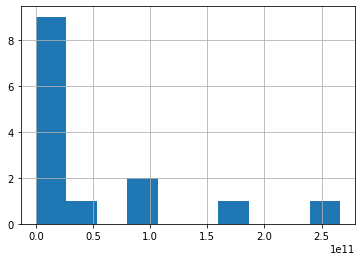

paramilitary


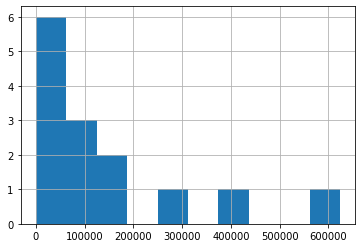

patrol_vess


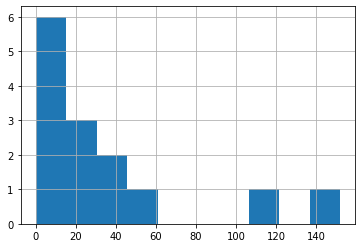

purchasing_power


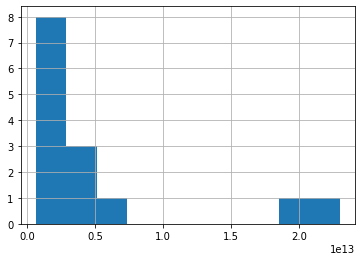

res_personnel


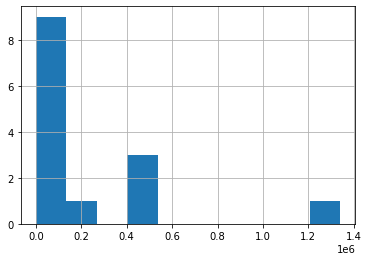

road_coverage


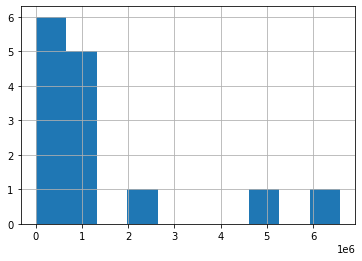

rocket_proj


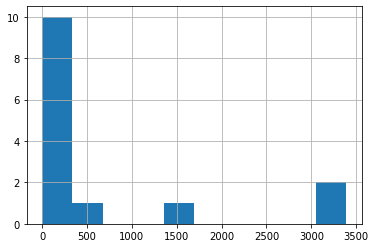

special_mission


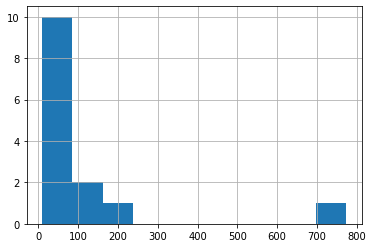

square_land_area


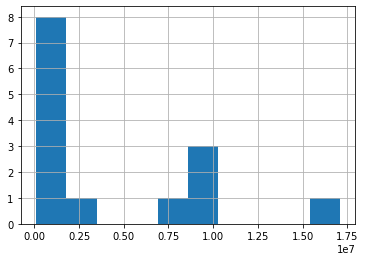

subs


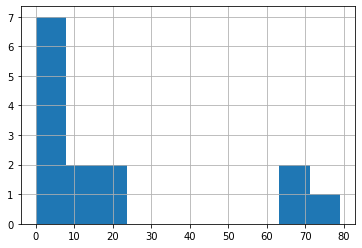

tanker_fleet


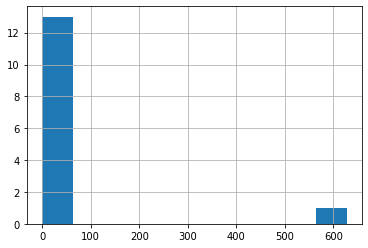

tanks


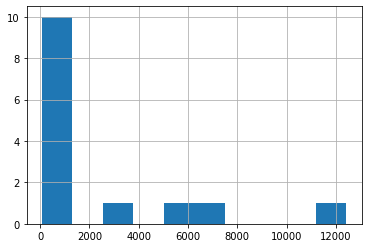

total_pop


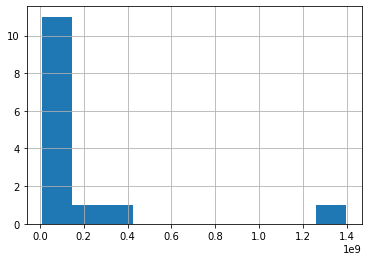

trainers


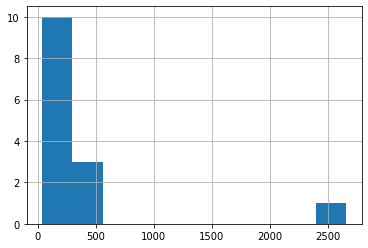

transports


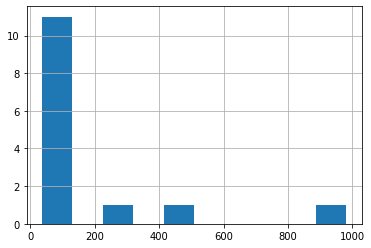

total_air_strength


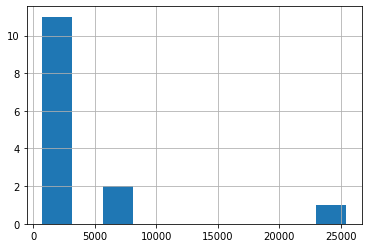

total_sea_strength


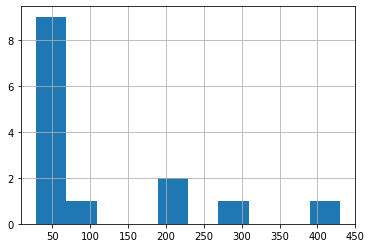

total_land_strength


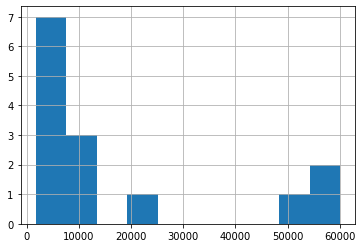

total_strengths


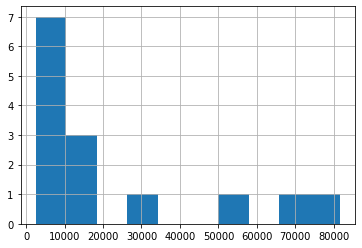

In [15]:
#histograms of numeric columns
for col in numcols:
    print(col)
    train[col].hist()
    plt.show()

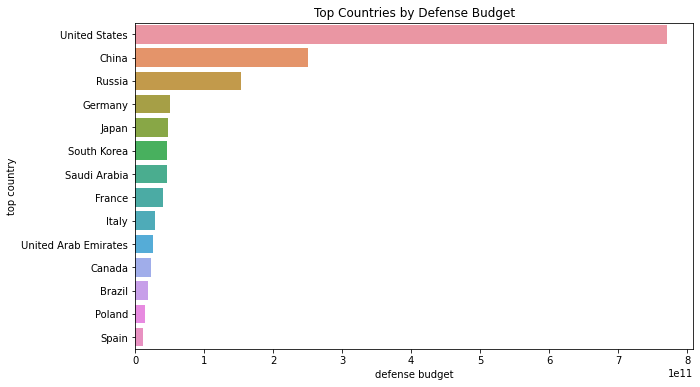

In [16]:
plt.figure(figsize=(10,6))
# make barplot and sort bars
sns.barplot(x='defense_budget', y="country", data=train.sort_values('defense_budget', ascending=False))
# set labels
plt.xlabel("defense budget")
plt.ylabel("top country")
plt.title("Top Countries by Defense Budget")
plt.show()

<AxesSubplot:xlabel='defense_budget', ylabel='country'>

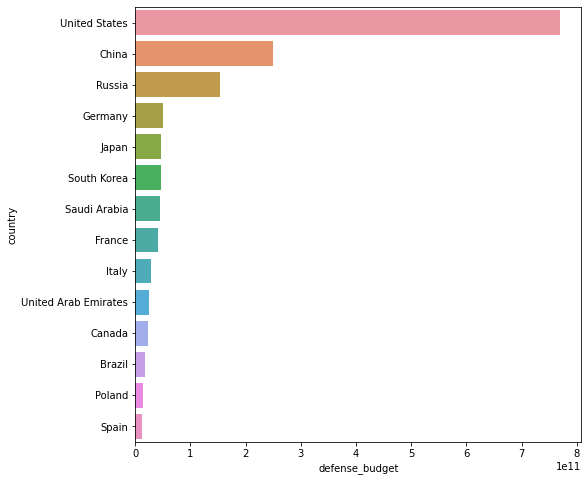

In [17]:
# same bar chart as above less code
plt.figure(figsize = (8,8))
sns.barplot(y='country', x='defense_budget',data=train.sort_values('defense_budget', ascending=False))

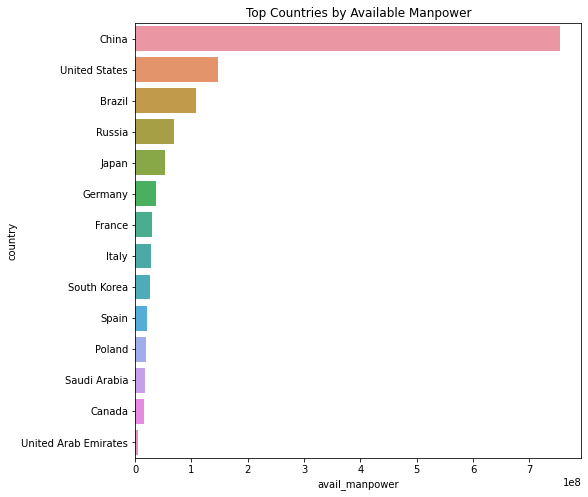

In [18]:
# same bar chart as above less code
plt.figure(figsize = (8,8))
sns.barplot(y='country', x='avail_manpower',data=train.sort_values('avail_manpower', ascending=False))
# set labels
plt.title("Top Countries by Available Manpower")
plt.show()

Text(0.5, 1.0, '"Is there a difference in defense_budget by country?"')

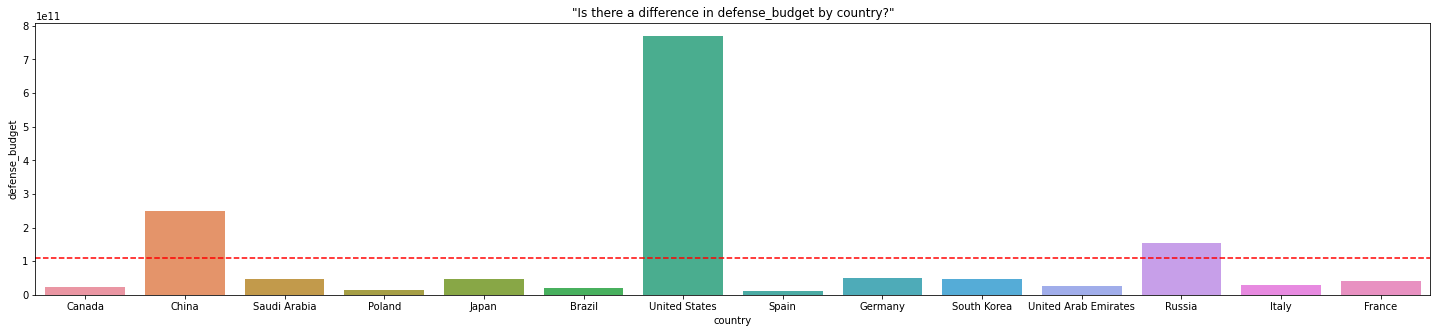

In [19]:
p = plt.figure(figsize=(25,5))
p = sns.barplot(train.country, train.defense_budget)
lmean = train.defense_budget.mean()
p = plt.axhline(lmean, ls='--', color='red')
plt.title('"Is there a difference in defense_budget by country?"')

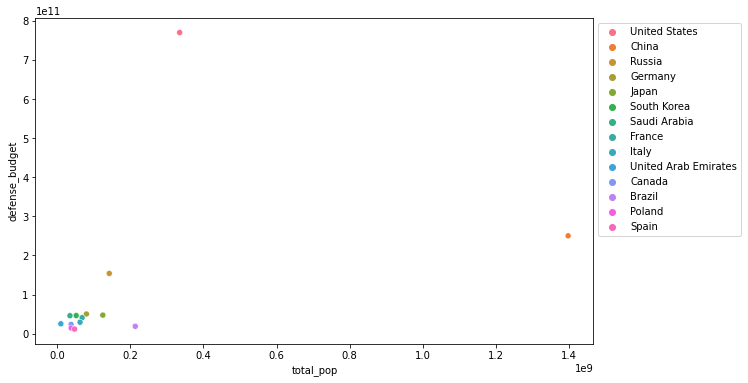

In [20]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='total_pop', y='defense_budget', hue='country',
                data=train.sort_values('defense_budget',ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1))

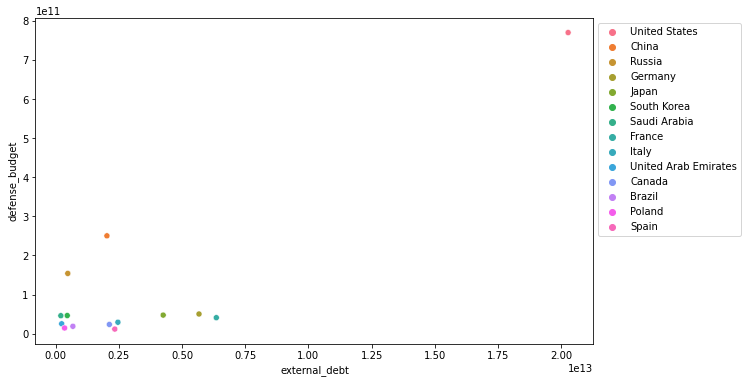

In [21]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='external_debt', y='defense_budget', hue='country',
                data=train.sort_values('defense_budget', ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1))

<AxesSubplot:>

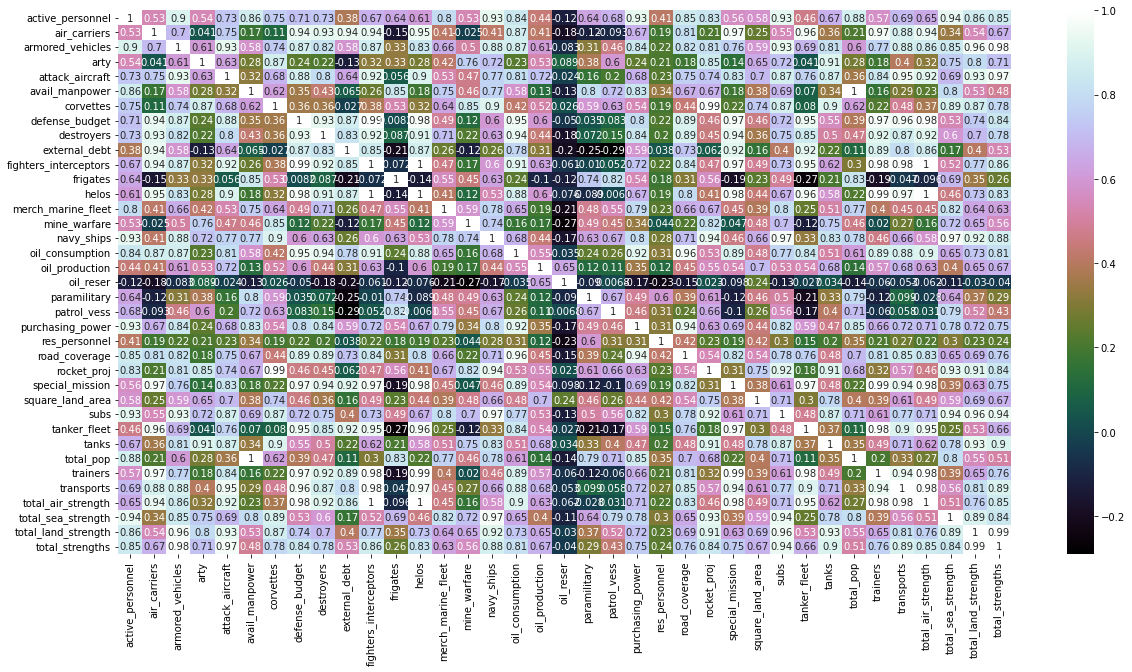

In [22]:
# Using heatmap visualize relationships between variables in high dimensional space.
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(),annot=True, cmap='cubehelix')

In [23]:
# ranks the countries by feature
df1=train.rank(ascending=False,method='min')
df1['country']=train['country']
df1['country_code']=train['country_code']

In [24]:
df1.head()

,country,country_code,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,...,subs,tanker_fleet,tanks,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength,total_strengths
22,Canada,CAN,13.0,10.0,14.0,12.0,14.0,13.0,11.0,11.0,...,10.0,7.0,14.0,12.0,12.0,14.0,14.0,14.0,14.0,14.0
26,China,CHN,1.0,4.0,2.0,3.0,3.0,1.0,2.0,2.0,...,1.0,9.0,3.0,1.0,4.0,3.0,3.0,1.0,3.0,3.0
104,Saudi Arabia,SAR,7.0,10.0,9.0,5.0,8.0,12.0,8.0,7.0,...,13.0,2.0,5.0,13.0,7.0,7.0,8.0,8.0,5.0,5.0
98,Poland,POL,11.0,10.0,12.0,8.0,13.0,11.0,9.0,13.0,...,12.0,12.0,7.0,11.0,13.0,7.0,13.0,13.0,11.0,11.0
58,Japan,JPN,6.0,2.0,10.0,6.0,6.0,5.0,6.0,5.0,...,5.0,6.0,6.0,5.0,3.0,6.0,5.0,5.0,8.0,8.0


In [25]:
# Ranks each feature of train (14) defense budgets
df2=df1.sort_values('defense_budget', ascending=True).head(14)
df2=df2.set_index('country')
df2=df2.T
df2=df2.drop('country_code', axis=0)
df2

country,United States,China,Russia,Germany,Japan,South Korea,Saudi Arabia,France,Italy,United Arab Emirates,Canada,Brazil,Poland,Spain
active_personnel,2.0,1.0,3.0,9.0,6.0,4.0,7.0,8.0,10.0,14.0,13.0,5.0,11.0,11.0
air_carriers,1.0,4.0,7.0,10.0,2.0,5.0,10.0,2.0,5.0,10.0,10.0,7.0,10.0,7.0
armored_vehicles,1.0,2.0,3.0,6.0,10.0,4.0,9.0,8.0,7.0,5.0,14.0,13.0,12.0,11.0
arty,4.0,3.0,1.0,14.0,6.0,2.0,5.0,11.0,13.0,9.0,12.0,7.0,8.0,10.0
attack_aircraft,1.0,3.0,2.0,7.0,6.0,4.0,8.0,10.0,5.0,11.0,14.0,9.0,13.0,12.0
avail_manpower,2.0,1.0,4.0,6.0,5.0,9.0,12.0,7.0,8.0,14.0,13.0,3.0,11.0,10.0
corvettes,3.0,2.0,1.0,7.0,6.0,4.0,8.0,11.0,11.0,5.0,11.0,9.0,9.0,11.0
defense_budget,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
destroyers,1.0,2.0,4.0,8.0,3.0,5.0,8.0,6.0,7.0,8.0,8.0,8.0,8.0,8.0
external_debt,1.0,8.0,10.0,3.0,4.0,11.0,14.0,2.0,5.0,13.0,7.0,9.0,12.0,6.0


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, 'transports'),
  Text(0.0, 0, 'active_personnel'),
  Text(5.0, 0, 'avail_manpower'),
  Text(10.0, 0, 'fighters_interceptors'),
  Text(15.0, 0, 'navy_ships'),
  Text(20.0, 0, 'patrol_vess'),
  Text(25.0, 0, 'special_mission'),
  Text(30.0, 0, 'total_pop'),
  Text(35.0, 0, 'total_land_strength'),
  Text(40.0, 0, '')])

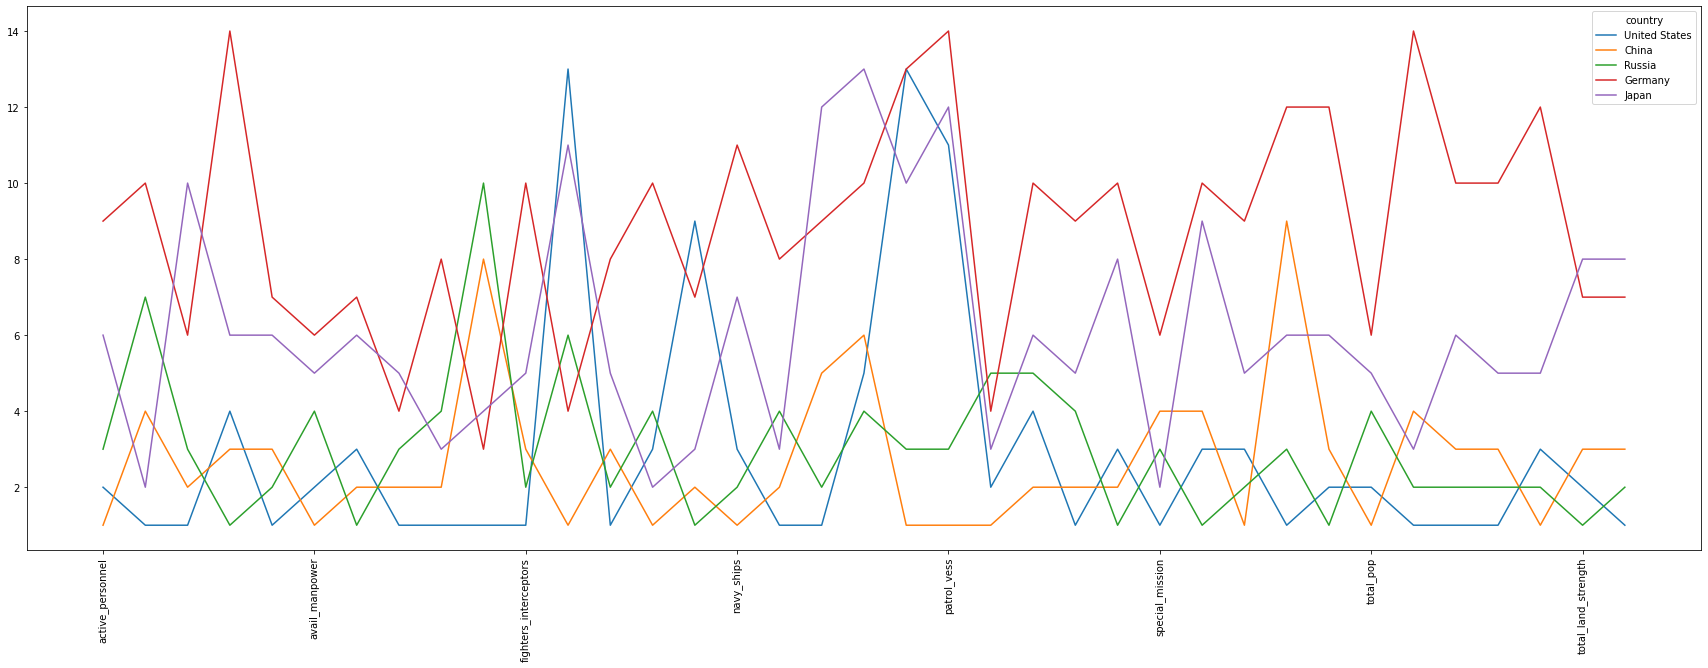

In [26]:
df2.iloc[:,0:5].plot(figsize=(30,10))
plt.xticks(rotation=90)

### Which features is USA ranked at #1?

In [27]:
# takes the number one positions from ranked data frame for USA.
df_usa=pd.DataFrame(df2[df2['United States']==1.0].index)
df_usa.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,air_carriers,armored_vehicles,attack_aircraft,defense_budget,destroyers,external_debt,fighters_interceptors,helos,oil_consumption,oil_production,road_coverage,special_mission,tanker_fleet,trainers,transports,total_air_strength,total_strengths


In [28]:
# lists the features where USA is ranked number 1.
np.array(df_usa[0])

array(['air_carriers', 'armored_vehicles', 'attack_aircraft',
       'defense_budget', 'destroyers', 'external_debt',
       'fighters_interceptors', 'helos', 'oil_consumption',
       'oil_production', 'road_coverage', 'special_mission',
       'tanker_fleet', 'trainers', 'transports', 'total_air_strength',
       'total_strengths'], dtype=object)

## USA has 15 features where they are ranked No. 1!!! that is 43% of the selected features.

#### What about C-H-I-N-A?

In [29]:
# Lists the features where China is ranked number 1.
df_china=pd.DataFrame(df2[df2['China']==1.0].index)
np.array(df_china.T)

array([['active_personnel', 'avail_manpower', 'frigates',
        'merch_marine_fleet', 'navy_ships', 'paramilitary',
        'patrol_vess', 'purchasing_power', 'subs', 'total_pop',
        'total_sea_strength']], dtype=object)

In [30]:
# Lists the features where Russia is ranked number 1.
df_russia=pd.DataFrame(df2[df2['Russia']==1.0].index)
np.array(df_russia.T)

array([['arty', 'corvettes', 'mine_warfare', 'rocket_proj',
        'square_land_area', 'tanks', 'total_land_strength']], dtype=object)

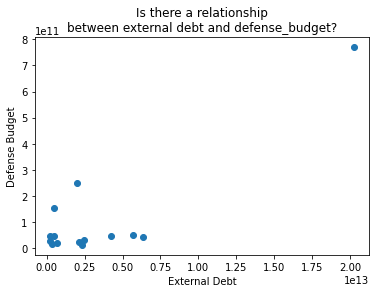

In [31]:
# plot defense budget and external debt
# plt.figure(figsize=(15,6))
plt.scatter(train.external_debt, train.defense_budget)
plt.xlabel("External Debt")
plt.ylabel("Defense Budget")
plt.title("Is there a relationship\nbetween external debt and defense_budget?")
plt.show()

### The higher the budget the more debt.

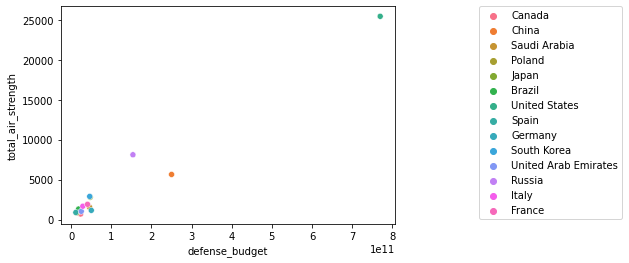

In [32]:
sns.scatterplot(x=train.defense_budget , y=train.total_air_strength, hue=train.country)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

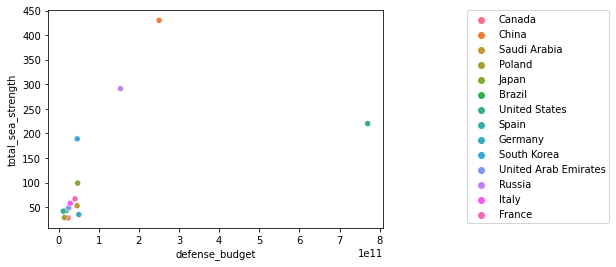

In [33]:
sns.scatterplot(x=train.defense_budget , y=train.total_sea_strength, hue=train.country)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

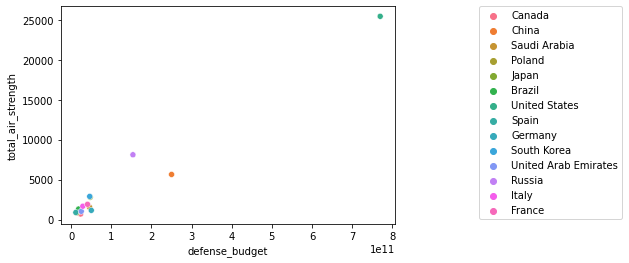

In [34]:
sns.scatterplot(x=train.defense_budget , y=train.total_air_strength, hue=train.country)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

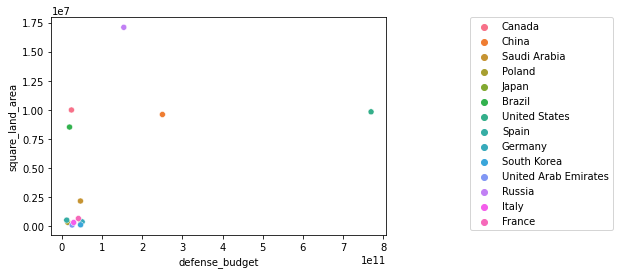

In [35]:
sns.scatterplot(x=train.defense_budget , y=train.square_land_area, hue=train.country)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

## Preprocessing

In [36]:
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test)

In [37]:
# removes country and country code

train_scaled

,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,destroyers,external_debt,...,subs,tanker_fleet,tanks,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength,total_strengths
22,-0.720506,-0.543746,-0.870179,-0.613044,-0.660690,-0.423253,-0.588751,-0.441740,-0.599111,-0.256408,...,-0.627702,-0.285249,-0.643377,-0.436506,-0.420436,-0.526671,-0.525668,-0.755848,-0.836658,-0.798244
26,2.772151,0.057236,1.681452,0.862105,0.637927,3.529076,2.070124,0.727913,1.038458,-0.275550,...,2.095798,-0.304028,0.869890,3.498032,-0.004799,0.462781,0.262806,2.671963,1.550341,1.307050
104,-0.440008,-0.543746,-0.514265,-0.001315,-0.431639,-0.413771,-0.436815,-0.325907,-0.599111,-0.635518,...,-0.772955,-0.185099,-0.356418,-0.445647,-0.331371,-0.475220,-0.390701,-0.542676,-0.420284,-0.433450
98,-0.630023,-0.543746,-0.622228,-0.497437,-0.600938,-0.410434,-0.512783,-0.488438,-0.599111,-0.606554,...,-0.736642,-0.322806,-0.414689,-0.435804,-0.478250,-0.475220,-0.502431,-0.747321,-0.601602,-0.606086
58,-0.412863,0.257564,-0.567789,-0.475405,-0.377862,-0.223643,-0.360847,-0.318257,0.838755,0.164093,...,-0.010375,-0.278990,-0.373402,-0.185543,0.035827,-0.435642,-0.190957,-0.150439,-0.559276,-0.491779
17,-0.195703,-0.343418,-0.837851,-0.478515,-0.483425,0.071981,-0.512783,-0.466329,-0.599111,-0.541473,...,-0.518762,-0.310287,-0.538842,0.071246,-0.300120,-0.174426,-0.425716,-0.627945,-0.767388,-0.717723
132,1.668254,3.462801,2.458622,0.080077,2.711332,0.278238,0.246895,3.409727,3.075434,3.327976,...,1.696351,3.601832,1.268704,0.422916,3.529676,3.217416,3.413519,0.881315,1.889352,2.356091
114,-0.630023,-0.343418,-0.603396,-0.594122,-0.590979,-0.394225,-0.588751,-0.502627,-0.599111,-0.214155,...,-0.700328,-0.322806,-0.571637,-0.409550,-0.365747,-0.475220,-0.495110,-0.636472,-0.644783,-0.637959
44,-0.514204,-0.543746,-0.284385,-0.623930,-0.401763,-0.313869,-0.398831,-0.303720,-0.599111,0.443953,...,-0.555075,-0.322806,-0.589499,-0.315109,-0.570440,-0.498967,-0.452774,-0.696160,-0.441397,-0.466439
112,0.157182,-0.143091,0.079535,1.131680,-0.258358,-0.372189,-0.170928,-0.324256,-0.119822,-0.585627,...,0.025938,-0.297768,0.100958,-0.396662,-0.176679,-0.506882,-0.175041,0.616982,0.284480,0.184540


In [38]:
# Standardize data using PCA (principal component analysis)
pca = PCA()
pca.fit(train_scaled)

PCA()

In [39]:
# shows how much variance is explained by each of the 14 individual components
pca.explained_variance_ratio_

array([5.87094948e-01, 2.08840629e-01, 8.73014390e-02, 4.31481817e-02,
       3.23805702e-02, 1.73011156e-02, 1.10297049e-02, 5.60019257e-03,
       3.30775074e-03, 1.77715496e-03, 1.32161396e-03, 7.12706580e-04,
       1.83992838e-04, 9.49791138e-34])

Text(0, 0.5, 'Cumulative Explained Variance')

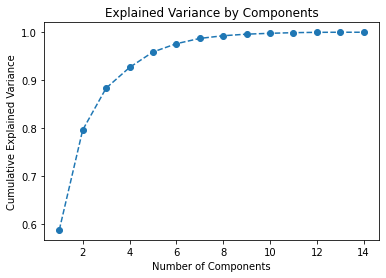

In [40]:
#plt.figure(figsize = (10,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

### The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [41]:
# we choose three components which is above 80%
pca = PCA(n_components = 3)

In [42]:
# fit the model to our data with the selected number of compenents = 3
pca.fit(train_scaled)

PCA(n_components=3)

In [43]:
# will only need the caluculated resulting components scores for the lements in our data set.
pca.transform(train_scaled)

array([[-3.01482575,  0.66131393,  0.56908714],
       [ 8.02089768, -6.62047846, -3.18938062],
       [-2.41925505,  0.34225603,  1.61025508],
       [-3.24983775,  0.40458705,  0.17461148],
       [-1.0335461 ,  0.76408658, -1.00994795],
       [-1.83789103, -0.44236683, -1.10751458],
       [11.86064001,  6.95332338, -0.4673554 ],
       [-3.06429526,  0.41381092, -0.54577316],
       [-2.64179549,  0.67410062, -0.52522644],
       [-0.56143031, -1.34089036,  0.05133482],
       [-3.12150511,  0.62632817,  0.58631999],
       [ 5.66162484, -3.35031272,  5.2645154 ],
       [-2.52271924,  0.30899454, -0.64585721],
       [-2.07606145,  0.60524715, -0.76506855]])

In [44]:
train_model = pca.transform(train_scaled)

## Now we will incorporate newly obtained PCA scores in the kmeans algorithm.

In [45]:
# within cluster sum of squares = wcss. Fit K Means using the transformed data from the PCA.
wcss = []
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(train_model)
    wcss.append(kmeans_pca.inertia_)

## Now plot the WCSS against the number of components on a graph.

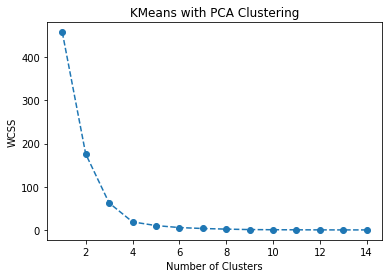

In [46]:
#plt.figure(figsize = (10,8))
plt.plot(range(1, 15), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title("KMeans with PCA Clustering")
plt.show()

### From the graph we determine the number of clusters to keep using elbow method = 4 clusters

## Modeling

In [47]:
# four clusters chosen, so we run Kmeans with the number of clusters equal to four
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
# fit data with the kmeans pca model
kmeans_pca.fit(train_model)
cluster = kmeans_pca.predict(train_model)

In [48]:
# Create new data frame with original features and add the PCA scores and assigned clusters.

df_pca_kmeans = pd.concat([train_scaled.reset_index(drop = True), pd.DataFrame(train_model)], axis = 1)
df_pca_kmeans.columns.values[-3:] = ['component_1','component_2','component_3']
df_pca_kmeans['KMeans_PCA'] = kmeans_pca.labels_

In [49]:
df_pca_kmeans.head()

,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,destroyers,external_debt,...,trainers,transports,total_air_strength,total_sea_strength,total_land_strength,total_strengths,component_1,component_2,component_3,KMeans_PCA
0,-0.720506,-0.543746,-0.870179,-0.613044,-0.660690,-0.423253,-0.588751,-0.441740,-0.599111,-0.256408,...,-0.420436,-0.526671,-0.525668,-0.755848,-0.836658,-0.798244,-3.014826,0.661314,0.569087,1
1,2.772151,0.057236,1.681452,0.862105,0.637927,3.529076,2.070124,0.727913,1.038458,-0.275550,...,-0.004799,0.462781,0.262806,2.671963,1.550341,1.307050,8.020898,-6.620478,-3.189381,2
2,-0.440008,-0.543746,-0.514265,-0.001315,-0.431639,-0.413771,-0.436815,-0.325907,-0.599111,-0.635518,...,-0.331371,-0.475220,-0.390701,-0.542676,-0.420284,-0.433450,-2.419255,0.342256,1.610255,1
3,-0.630023,-0.543746,-0.622228,-0.497437,-0.600938,-0.410434,-0.512783,-0.488438,-0.599111,-0.606554,...,-0.478250,-0.475220,-0.502431,-0.747321,-0.601602,-0.606086,-3.249838,0.404587,0.174611,1
4,-0.412863,0.257564,-0.567789,-0.475405,-0.377862,-0.223643,-0.360847,-0.318257,0.838755,0.164093,...,0.035827,-0.435642,-0.190957,-0.150439,-0.559276,-0.491779,-1.033546,0.764087,-1.009948,1


In [50]:
# create new column named Clusters and map the four clusters directly inside it.
df_pca_kmeans['clusters'] = df_pca_kmeans['KMeans_PCA'].map({0:'1', 1:'2', 2:'3', 3:'4'})

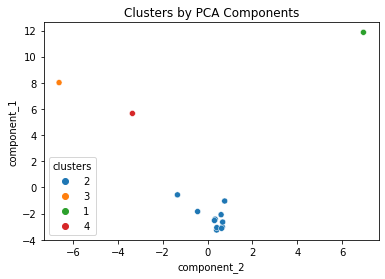

In [51]:
# Plots data by PCA Components.
x_axis = df_pca_kmeans['component_2']
y_axis = df_pca_kmeans['component_1']
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['clusters'])
plt.title('Clusters by PCA Components')
plt.show()

In [52]:
# creates a new data frame with components and cluster only

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(train_model)

train_pca = pd.DataFrame(data=pca_fit, columns=['component_1', 'component_2','component_3'])
train_pca['cluster'] = kmeans_pca.predict(train_model)
train_pca.head()

,component_1,component_2,component_3,cluster
0,-3.014826,0.661314,0.569087,1
1,8.020898,-6.620478,-3.189381,2
2,-2.419255,0.342256,1.610255,1
3,-3.249838,0.404587,0.174611,1
4,-1.033546,0.764087,-1.009948,1


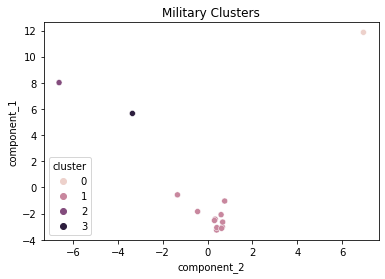

In [53]:

sns.scatterplot(data=train_pca, x='component_2', y='component_1', hue='cluster')
plt.title('Military Clusters');